In [32]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [47]:
df=pd.read_csv('C:\\Users\\RANA ASIM\\Downloads\\archive (4)\\tested.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Unnamed: 4,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
285,1177,0,3,"Dennis, Mr. William",male,36.0,0,0,A/5 21175,7.2500,NaN,S
61,953,0,2,"McCrae, Mr. Arthur Gordon",male,32.0,0,0,237216,13.5000,NaN,S
359,1251,1,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S
239,1131,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C86,C
350,1242,1,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,0,1,PC 17759,63.3583,D10 D12,C


In [48]:
df1=df[['Survived','Age','Parch','Fare']]

In [57]:
df2=df[['Unnamed: 4','Embarked']]

In [59]:
df1.isnull().mean()

Survived    0.000000
Age         0.205742
Parch       0.000000
Fare        0.174641
dtype: float64

In [60]:
df2.isnull().sum()

Unnamed: 4    2
Embarked      7
dtype: int64

In [7]:
X=df1.drop('Survived',axis=1)
y=df1['Survived']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print('sahpe of X_train',X_train.shape)
print('sahpe of y_train',y_train.shape)
print('sahpe of X_test',X_test.shape)
print('sahpe of y_test',y_test.shape)

sahpe of X_train (334, 3)
sahpe of y_train (334,)
sahpe of X_test (84, 3)
sahpe of y_test (84,)


In [9]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [10]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

X_train['Fare_median']=X_train['Fare'].fillna(median_age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_age)

In [12]:
X_train.sample(5)

,Age,Parch,Fare,Age_median,Age_mean,Fare_median,Fare_mean
319,22.0,0,31.5000,22.0,22.000000,31.5000,31.5000
284,2.0,1,20.2125,2.0,2.000000,20.2125,20.2125
358,NaN,0,7.7500,27.0,30.115763,7.7500,7.7500
20,55.0,0,59.4000,55.0,55.000000,59.4000,59.4000
49,36.0,2,15.9000,36.0,36.000000,15.9000,15.9000


In [14]:
print('original age variable varianca',X_train['Age'].var())
print('mean_imputation fare variable varianca',X_train['Age_mean'].var())
print('median fare variable varianca',X_train['Age_median'].var())

print('original fare variable varianca',  X_train['Fare'].var())
print('mean_imputation fare variable varianca',  X_train['Fare_mean'].var())
print('median fare variable varianca',  X_train['Fare_median'].var())

original age variable varianca 214.7917455836333
mean_imputation fare variable varianca 168.3502870790639
median fare variable varianca 169.9968260676845
original fare variable varianca 3518.9079531326283
mean_imputation fare variable varianca 2902.833443204126
median fare variable varianca 2910.7222586357684


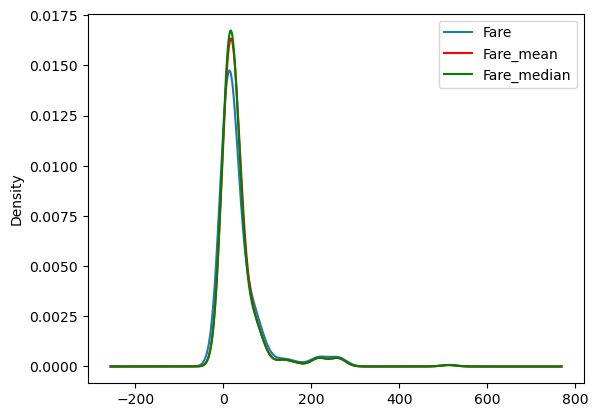

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#original
X_train['Fare'].plot(kind='kde',ax=ax)
#mean
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='r')
#median
X_train['Fare_median'].plot(kind='kde',ax=ax,color='g')
plt.legend()

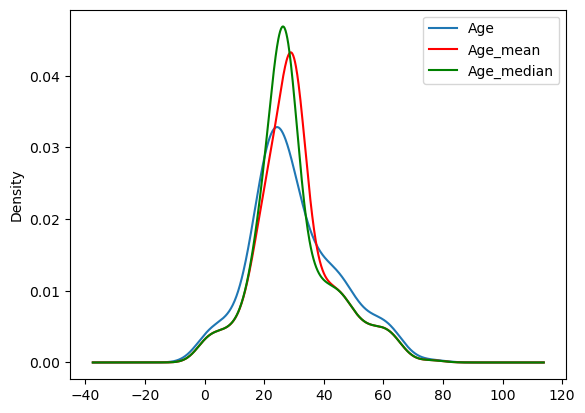

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
X_train['Age'].plot(kind='kde',ax=ax)
#mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='r')
#median
X_train['Age_median'].plot(kind='kde',ax=ax,color='g')
plt.legend()

In [24]:
X_train.cov()

,Age,Parch,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,214.791746,-0.616278,368.548371,214.791746,214.791746,304.483408,303.800249
Parch,-0.616278,0.878181,12.695550,-0.388510,-0.483029,10.625926,10.571215
Fare,368.548371,12.695550,3518.907953,304.211180,287.899271,3518.907953,3518.907953
Age_median,214.791746,-0.388510,304.211180,169.996826,168.350287,251.906375,251.421027
Age_mean,214.791746,-0.483029,287.899271,168.350287,168.350287,238.649158,238.113709
Fare_median,304.483408,10.625926,3518.907953,251.906375,238.649158,2910.722259,2906.069754
Fare_mean,303.800249,10.571215,3518.907953,251.421027,238.113709,2906.069754,2902.833443


<Axes: >

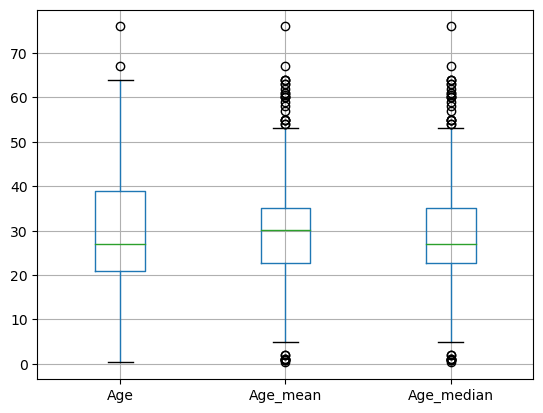

In [25]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

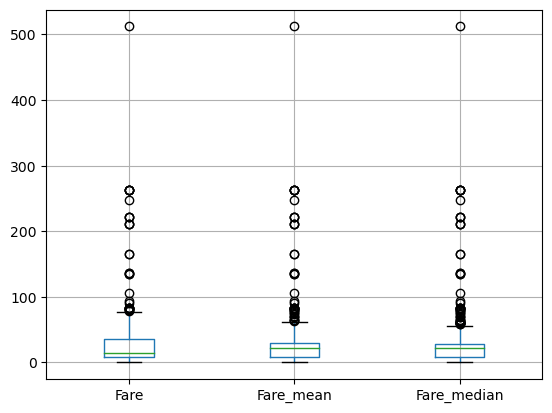

In [26]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# SKlearn

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [34]:
si1=SimpleImputer(strategy='median')
si2=SimpleImputer(strategy='mean')

In [37]:
trf=ColumnTransformer([
    ('imputer1',si1,['Age']),
    ('imputer2',si2,['Fare'])
],remainder='passthrough')

In [38]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [43]:
trf.named_transformers_['imputer1'].statistics_

array([27.])

In [44]:
trf.named_transformers_['imputer2'].statistics_

array([33.53772727])

In [45]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [46]:
X_train

array([[23.    ,  8.6625,  0.    ],
       [ 2.    , 20.2125,  1.    ],
       [39.    , 13.4167,  1.    ],
       ...,
       [29.    ,  7.925 ,  0.    ],
       [24.    , 27.7208,  0.    ],
       [27.    , 27.7208,  0.    ]])

# Catagorical

<Axes: >

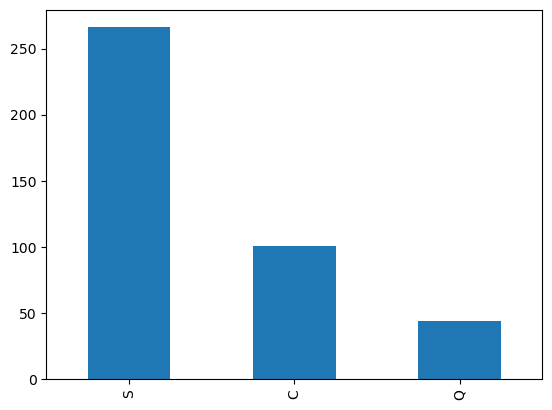

In [62]:
df2['Embarked'].value_counts().plot.bar()